This example script aims to monitor the top traded commodities of specific countries. Note: monthly data are required.

In [137]:
# Install a pip comtradeapicall package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install --upgrade comtradeapicall
# Install a pip pandas package in the current Jupyter kernel
!{sys.executable} -m pip install pandas
# Install a pip matplotlib package in the current Jupyter kernel
!{sys.executable} -m pip install matplotlib

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import comtradeapicall

In [139]:
#from getpass import getpass
#subscription_key = getpass('Enter the API subscription_key: ')
subscription_key = '<subscription-key>'

Input parameters: reporter code in ISO, base year (to obtain the top products), flow and no of months

In [140]:
countryISO = 'FRA'
baseYear = '2021'
flow = 'X'
noOfPeriod = 15

Get the available months using data availability

In [141]:
df_availableperiods = comtradeapicall.getFinalDataAvailability(subscription_key=subscription_key,typeCode='C',freqCode='M',clCode='HS',reporterCode=comtradeapicall.convertCountryIso3ToCode(countryISO),period=None)
df_availableperiods["period"]=df_availableperiods["period"].values.astype(str)
targetPeriod_list = ','.join(df_availableperiods.sort_values(by='period', ascending=False)['period'].head(noOfPeriod).to_list())

In [142]:
#get the top 4 digits exported commodities
#classic breakdown mode will set the partner2Code to World, customsCode to Total, and motCode to Total.
df_CA_BaseYear_4Digit = comtradeapicall._getFinalData(subscription_key, typeCode='C', freqCode='A', clCode='HS',period=baseYear,reporterCode=comtradeapicall.convertCountryIso3ToCode(countryISO),cmdCode='AG4', flowCode=flow, partnerCode=0, partner2Code=None, customsCode=None,motCode=None,breakdownMode='classic', includeDesc=True)

Show the top traded products

In [143]:
df_CA_BaseYear_4Digit.sort_values(by='primaryValue', ascending=False)[['cmdCode','cmdDesc','primaryValue']].head(5)

,cmdCode,cmdDesc,primaryValue
963,3004,"Medicaments; (not goods of heading no. 3002, 3...",2.700295e+10
83,8802,Aircraft n.e.c. in heading no. 8801 (e.g. heli...,2.575560e+10
115,9999,Commodities not specified according to kind,2.188011e+10
510,8703,Motor cars and other motor vehicles; principal...,2.079702e+10
950,8708,"Motor vehicles; parts and accessories, of head...",1.383387e+10


Obtaining the monthly top trade products using monthly

In [144]:
listofcmd = ','.join(df_CA_BaseYear_4Digit.sort_values(by='primaryValue', ascending=False)['cmdCode'].head(5).to_list())

In [145]:
df_CM_top5 = comtradeapicall._getFinalData(subscription_key, typeCode='C', freqCode='M', clCode='HS', period=targetPeriod_list, reporterCode=comtradeapicall.convertCountryIso3ToCode(countryISO),cmdCode=listofcmd, flowCode=flow, partnerCode=0, partner2Code=None, customsCode=None,motCode=None,
breakdownMode='classic', includeDesc=True)

Show the changes in top trade products (monthly)

<Axes: xlabel='period'>

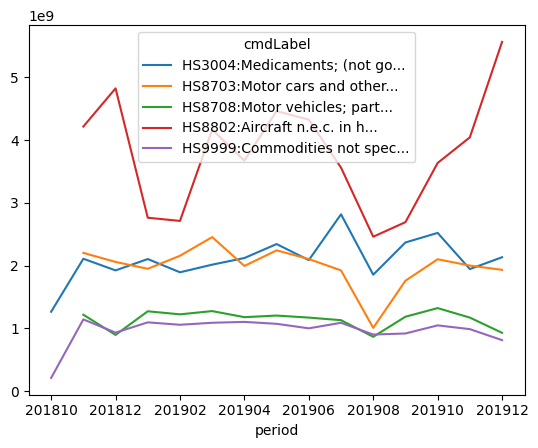

In [146]:
df_top5 = df_CM_top5.copy()
df_top5['cmdLabel'] = 'HS' + df_top5['cmdCode'] + ':' + df_top5['cmdDesc'].str[0:20] + '...'
df_top5.set_index(['period'],inplace=True)
df_top5.set_index('cmdLabel',append=True).unstack()['primaryValue'].plot()